In [1]:
import pandas as pd

In [2]:
import random

In [3]:
import numpy as np

In [5]:
data = []
for _ in range(500):
  team_name = f"Team {chr(random.randint(65,90))}"
  season = random.randint(2010, 2023)
  wins = random.randint(50,110)
  losses = 162 - wins
  hits = random.randint(1200,1600)
  doubles = random.randint(200,350)
  triples = random.randint(10,40)
  home_runs = random.randint(100,250)
  strikeouts = random.randint(1000,1500)

  hits_adjusted = hits + (wins-80) * 5
  doubles_adjusted = doubles + (wins-80) * 2
  triples_adjusted = triples + (wins-80)
  home_runs_adjusted = home_runs + (wins-80) * 3
  strikeouts_adjusted = strikeouts - (wins-80) * 10

  data.append([team_name, season, wins, losses, hits_adjusted, doubles_adjusted, triples_adjusted, home_runs_adjusted, strikeouts_adjusted])


In [6]:
columns = ["Team","Season","Wins","Losses","Hits","Doubles","Triples","Home_runs","Strikeouts"]

In [7]:
df = pd.DataFrame(data, columns=columns)

In [8]:
df.head()

,Team,Season,Wins,Losses,Hits,Doubles,Triples,Home_runs,Strikeouts
0,Team Y,2017,102,60,1683,279,32,310,971
1,Team Z,2013,109,53,1628,329,61,304,1045
2,Team E,2022,102,60,1401,308,61,190,1185
3,Team Y,2014,61,101,1354,168,20,156,1367
4,Team V,2012,65,97,1515,280,-5,121,1503


In [9]:
df.tail()

,Team,Season,Wins,Losses,Hits,Doubles,Triples,Home_runs,Strikeouts
495,Team M,2010,59,103,1466,181,16,169,1608
496,Team M,2011,63,99,1510,285,0,142,1205
497,Team S,2013,70,92,1370,320,26,161,1560
498,Team E,2015,101,61,1493,328,48,177,972
499,Team L,2015,78,84,1401,289,17,188,1318


In [10]:
import seaborn as sns

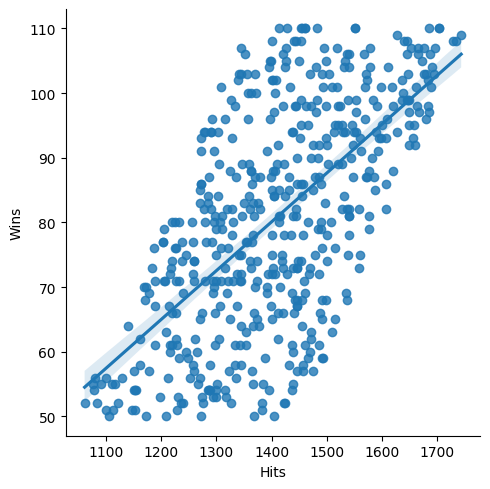

In [11]:
import matplotlib.pyplot as plt
sns.lmplot(x="Hits", y="Wins", data=df)
plt.show()

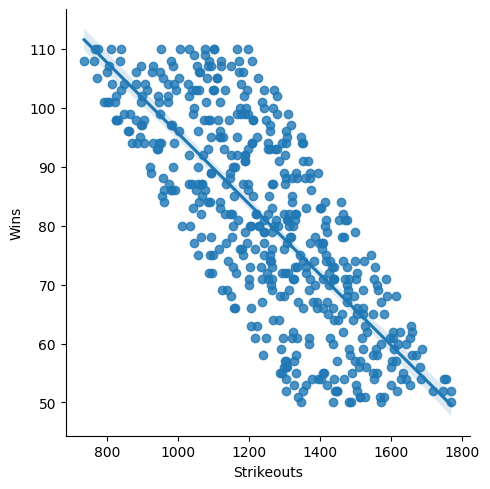

In [12]:
sns.lmplot(x="Strikeouts", y="Wins", data=df)
plt.show()

In [13]:
df2 = df.drop(columns=["Team","Season","Losses"], axis=1)

In [14]:
df2.head()

,Wins,Hits,Doubles,Triples,Home_runs,Strikeouts
0,102,1683,279,32,310,971
1,109,1628,329,61,304,1045
2,102,1401,308,61,190,1185
3,61,1354,168,20,156,1367
4,65,1515,280,-5,121,1503


In [15]:
X = df2.drop(columns=["Wins"], axis=1)
y = df2["Wins"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr.score(X_test, y_test)

0.8742030202177151

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
y_pred = lr.predict(X_test)

In [24]:
mean_absolute_error(y_test, y_pred)

5.10517581807768

In [25]:
mean_squared_error(y_test, y_pred)

37.628027781235694

In [26]:
r2_score(y_test, y_pred)

0.8742030202177151

In [27]:
lr.coef_

array([ 0.01426463,  0.04060748,  0.39475036,  0.05313101, -0.01881443])

In [28]:
lr.intercept_

np.float64(53.192205864735826)